# DA for AQMS in QLD
### The current version is to wrangle and clean the AQ data from the AQMS in QLD, or AMNS in QLD

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from data_fetcher import qld_amns_data_fetcher as qadf

In [2]:
years = [2019,2020,2021,2022,2023]
amns = ["Boat Creek", "Memorial Park", "South Gladstone"]

In [4]:
bc_data = qadf(years=years, location="Boat Creek").fetch().format().wrangle(quantity_group=['dust','voc'])
mp_data = qadf(years=years, location="Memorial Park").fetch().format().wrangle(quantity_group=['dust','voc'])
sg_data = qadf(years=years, location="South Gladstone").fetch().format().wrangle(quantity_group=['dust','voc'])

In [9]:
df_bc_yr_avg = bc_data.average(period='year')
df_bc_yr_avg.T

,0,1,2,3,4
year,2019.00,2020.00,2021.00,2022.00,2023.00
NO2,9.91,9.29,8.83,8.53,9.10
SO2,4.51,3.51,3.82,3.77,3.76
PM10,21.69,15.51,14.96,14.96,17.40
PM2.5,8.11,5.75,5.17,5.27,6.55


In [8]:
df_mp_yr_avg = mp_data.average(period='year')
df_mp_yr_avg.T

,0,1,2,3,4
year,2019.00,2020.00,2021.00,2022.00,2023.00
NO2,7.58,7.31,8.07,7.54,7.66
SO2,9.54,6.05,5.49,5.62,5.37
Benzene,4.10,3.49,3.97,2.28,2.68
Toluene,7.38,6.25,6.07,4.46,4.27
Xylenes,33.55,29.93,28.15,16.45,17.85


In [10]:
df_sg_yr_avg = sg_data.average(period='year')
df_sg_yr_avg.T

,0,1,2,3,4
year,2019.00,2020.00,2021.00,2022.00,2023.00
NO2,9.21,8.94,8.62,8.44,8.04
SO2,6.38,6.29,4.37,5.71,5.60
PM10,15.93,12.99,12.09,11.01,17.97
PM2.5,6.36,5.61,5.01,4.33,6.65


In [18]:
df_bc_1hr_avg = bc_data.average(period='1hr')
df_bc_1hr_avg[['NO2','NO2_90']]

,NO2,NO2_90
0,122.20,22.56
1,71.44,20.68
2,78.96,20.68
3,60.16,18.80
4,69.56,20.68


In [19]:
df_mp_1hr_avg = mp_data.average(period='1hr')
df_mp_1hr_avg[['NO2','NO2_90']]

,NO2,NO2_90
0,62.04,15.04
1,62.04,16.92
2,65.80,16.92
3,60.16,16.92
4,73.32,18.80


In [20]:
df_sg_1hr_avg = sg_data.average(period='1hr')
df_sg_1hr_avg[['NO2','NO2_90']]

,NO2,NO2_90
0,67.68,20.68
1,60.16,18.80
2,60.16,18.80
3,60.16,18.80
4,62.04,18.80


In [27]:
df_bc_24hr_avg = bc_data.average(period='24hr')
df_bc_24hr_avg[['PM10','PM10_90']]

,PM10,PM10_90
0,142.60,34.44
1,39.05,21.71
2,46.49,19.70
3,31.46,21.40
4,127.38,23.81


In [28]:
df_sg_24hr_avg = sg_data.average(period='24hr')
df_sg_24hr_avg[['PM10','PM10_90']]

,PM10,PM10_90
0,130.35,26.54
1,32.32,19.49
2,27.54,17.73
3,24.92,16.10
4,106.65,25.75


### try some plots

> # NOx hourly

In [9]:
FontSize = 18
TickSize = 18

In [10]:
df_sg['Time']

Datetime
2019-01-01 00:00:00    00:00
2019-01-01 01:00:00    01:00
2019-01-01 02:00:00    02:00
2019-01-01 03:00:00    03:00
2019-01-01 04:00:00    04:00
                       ...  
2023-12-31 19:00:00    19:00
2023-12-31 20:00:00    20:00
2023-12-31 21:00:00    21:00
2023-12-31 22:00:00    22:00
2023-12-31 23:00:00    23:00
Name: Time, Length: 43824, dtype: object

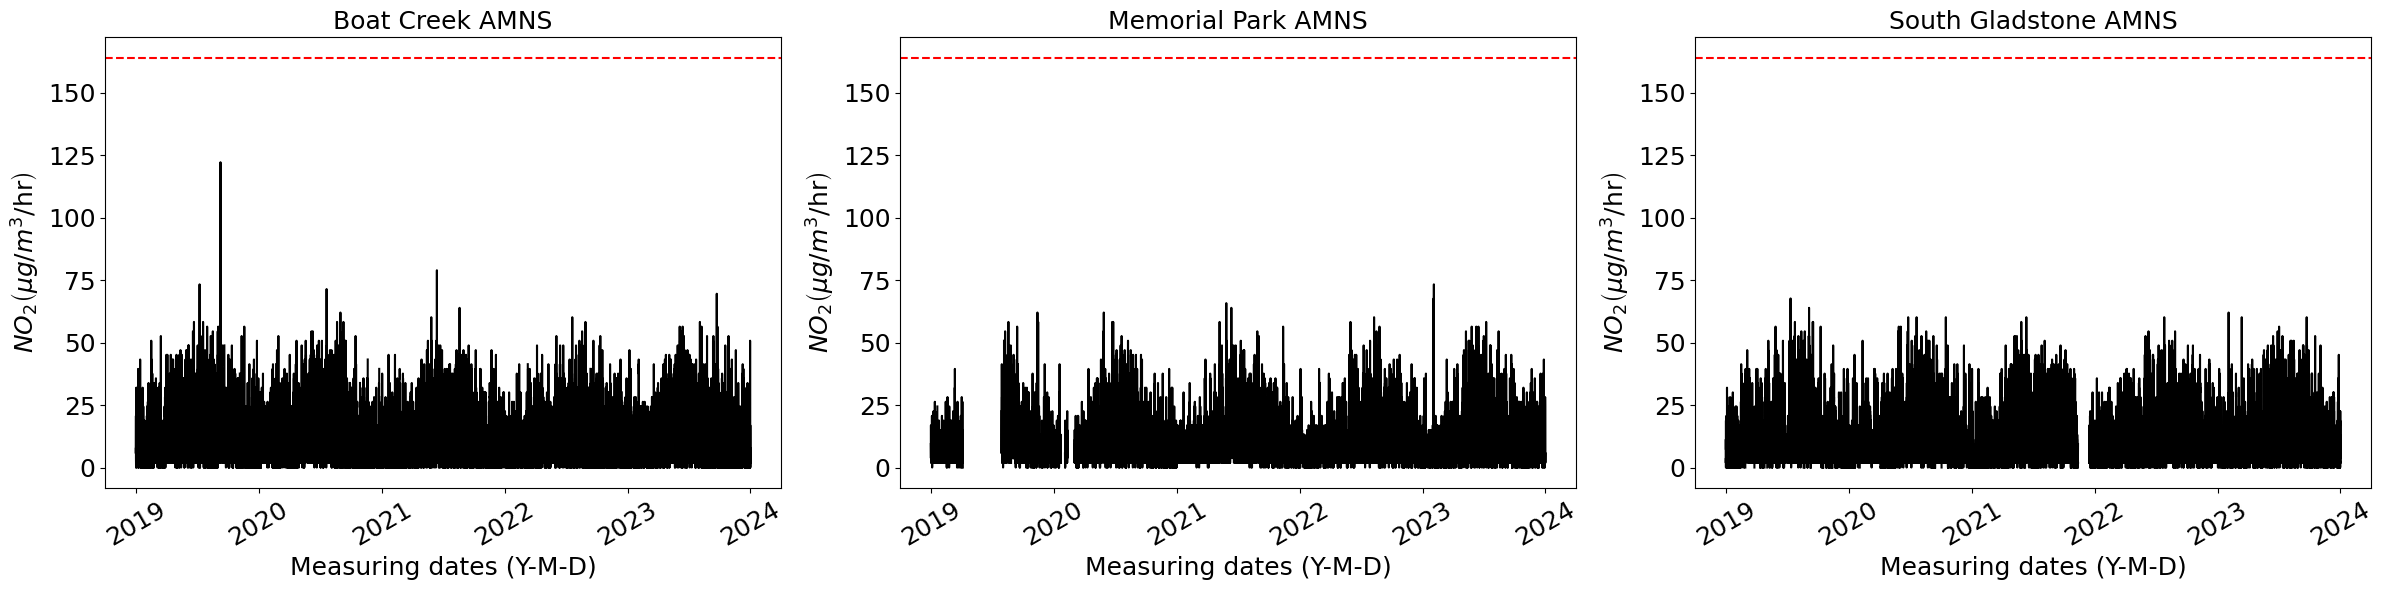

In [11]:
criterion = 164
# plot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 6))

# Boat Creek
y = df_bc['Nitrogen Dioxide (ug/m^3)']
x = df_bc.index
ax1.plot(x,y,'k-')
ax1.axhline(y=criterion, color='red', linestyle='--', label=f'Criterion: {criterion}')
ax1.set_xlabel('Measuring dates (Y-M-D)', fontsize=FontSize)
ax1.set_ylabel(r'$NO_2 \left(\mu g/m^3/\text{hr}\right)$', fontsize=FontSize)
ax1.tick_params(axis='x', rotation=30, labelsize=TickSize)
ax1.tick_params(axis='y', labelsize=TickSize)
ax1.set_title('Boat Creek AMNS', fontsize=TickSize)

# Memorial Park
y = df_mp['Nitrogen Dioxide (ug/m^3)']
x = df_mp.index
ax2.plot(x,y,'k-')
ax2.axhline(y=criterion, color='red', linestyle='--', label=f'Criterion: {criterion}')
ax2.set_xlabel('Measuring dates (Y-M-D)', fontsize=FontSize)
ax2.set_ylabel(r'$NO_2 \left(\mu g/m^3/\text{hr}\right)$', fontsize=FontSize)
ax2.tick_params(axis='x', rotation=30, labelsize=TickSize)
ax2.tick_params(axis='y', labelsize=TickSize)
ax2.set_title('Memorial Park AMNS', fontsize=TickSize)

# South Gladstone
y = df_sg['Nitrogen Dioxide (ug/m^3)']
x = df_sg.index
ax3.plot(x,y,'k-')
ax3.axhline(y=criterion, color='red', linestyle='--', label=f'Criterion: {criterion}')
ax3.set_xlabel('Measuring dates (Y-M-D)', fontsize=FontSize)
ax3.set_ylabel(r'$NO_2 \left(\mu g/m^3/\text{hr}\right)$', fontsize=FontSize)
ax3.tick_params(axis='x', rotation=30, labelsize=TickSize)
ax3.tick_params(axis='y', labelsize=TickSize)
ax3.set_title('South Gladstone AMNS', fontsize=TickSize)

# plot
plt.tight_layout()
plt.show()

In [12]:
df_bc['Nitrogen Dioxide (ug/m^3)'].max()

np.float64(122.2)

In [13]:
df_mp['Nitrogen Dioxide (ug/m^3)'].max()

np.float64(73.32)

In [14]:
df_sg['Nitrogen Dioxide (ug/m^3)'].max()

np.float64(67.67999999999999)

> # get some 24hr average data

> # 24hr average data for PM10

In [15]:
df_24 = df_bc.groupby(by=['year','month','day'])['PM10 (ug/m^3)'].mean().reset_index()
df_24['date'] = pd.to_datetime(df_24[['year', 'month', 'day']])
df_24.head()

,year,month,day,PM10 (ug/m^3),date
0,2019,1,1,18.883333,2019-01-01
1,2019,1,2,13.841667,2019-01-02
2,2019,1,3,16.204167,2019-01-03
3,2019,1,4,17.962500,2019-01-04
4,2019,1,5,23.162500,2019-01-05


Boat Creek PM10 24hr max is 142.59545454545457
South Gladstone PM10 24hr max is 130.35416666666666


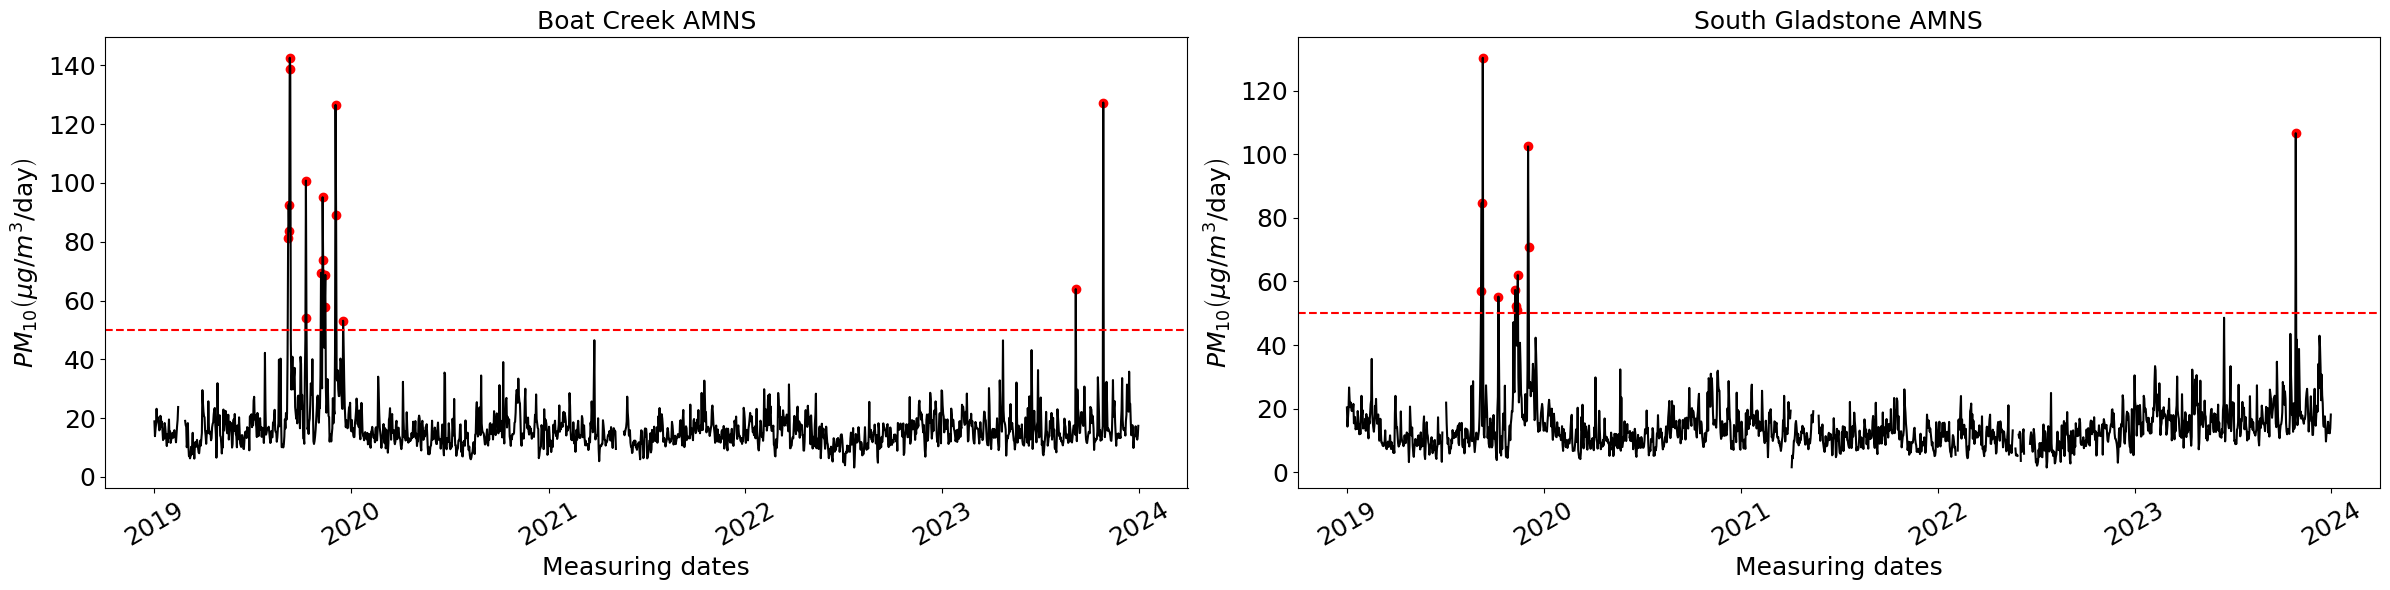

In [16]:
criterion = 50
# plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 6))

# Boat Creek
df_24 = df_bc.groupby(by=['year','month','day'])['PM10 (ug/m^3)'].mean().reset_index()
df_24['date'] = pd.to_datetime(df_24[['year', 'month', 'day']])
y = df_24['PM10 (ug/m^3)']
x = df_24.date
ax1.plot(x,y,'k-')
ax1.axhline(y=criterion, color='red', linestyle='--', label=f'Criterion: {criterion}')
ax1.set_xlabel('Measuring dates', fontsize=FontSize)
ax1.set_ylabel(r'$PM_{10} \left(\mu g/m^3/\text{day}\right)$', fontsize=FontSize)
ax1.tick_params(axis='x', rotation=30, labelsize=TickSize)
ax1.tick_params(axis='y', labelsize=TickSize)
ax1.set_title('Boat Creek AMNS', fontsize=TickSize)
# show the exceedance
z = df_24[y > criterion]
ax1.scatter(z.date, z['PM10 (ug/m^3)'], color='red', label=f'y > {criterion}')

print(f'Boat Creek PM10 24hr max is {y.max()}')

# South Gladstone
df_24 = df_sg.groupby(by=['year','month','day'])['PM10 (ug/m^3)'].mean().reset_index()
df_24['date'] = pd.to_datetime(df_24[['year', 'month', 'day']])
y = df_24['PM10 (ug/m^3)']
x = df_24.date
ax2.plot(x,y,'k-')
ax2.axhline(y=criterion, color='red', linestyle='--', label=f'Criterion: {criterion}')
ax2.set_xlabel('Measuring dates', fontsize=FontSize)
ax2.set_ylabel(r'$PM_{10} \left(\mu g/m^3/\text{day}\right)$', fontsize=FontSize)
ax2.tick_params(axis='x', rotation=30, labelsize=TickSize)
ax2.tick_params(axis='y', labelsize=TickSize)
ax2.set_title('South Gladstone AMNS', fontsize=TickSize)
# show the exceedance
z = df_24[y > criterion]
ax2.scatter(z.date, z['PM10 (ug/m^3)'], color='red', label=f'y > {criterion}')

print(f'South Gladstone PM10 24hr max is {y.max()}')

# plot
plt.tight_layout()
plt.show()

> # 24 Hr PM2.5

Boat Creek PM2.5 24hr max is 91.79583333333333
South Gladstone PM2.5 24hr max is 78.54583333333333


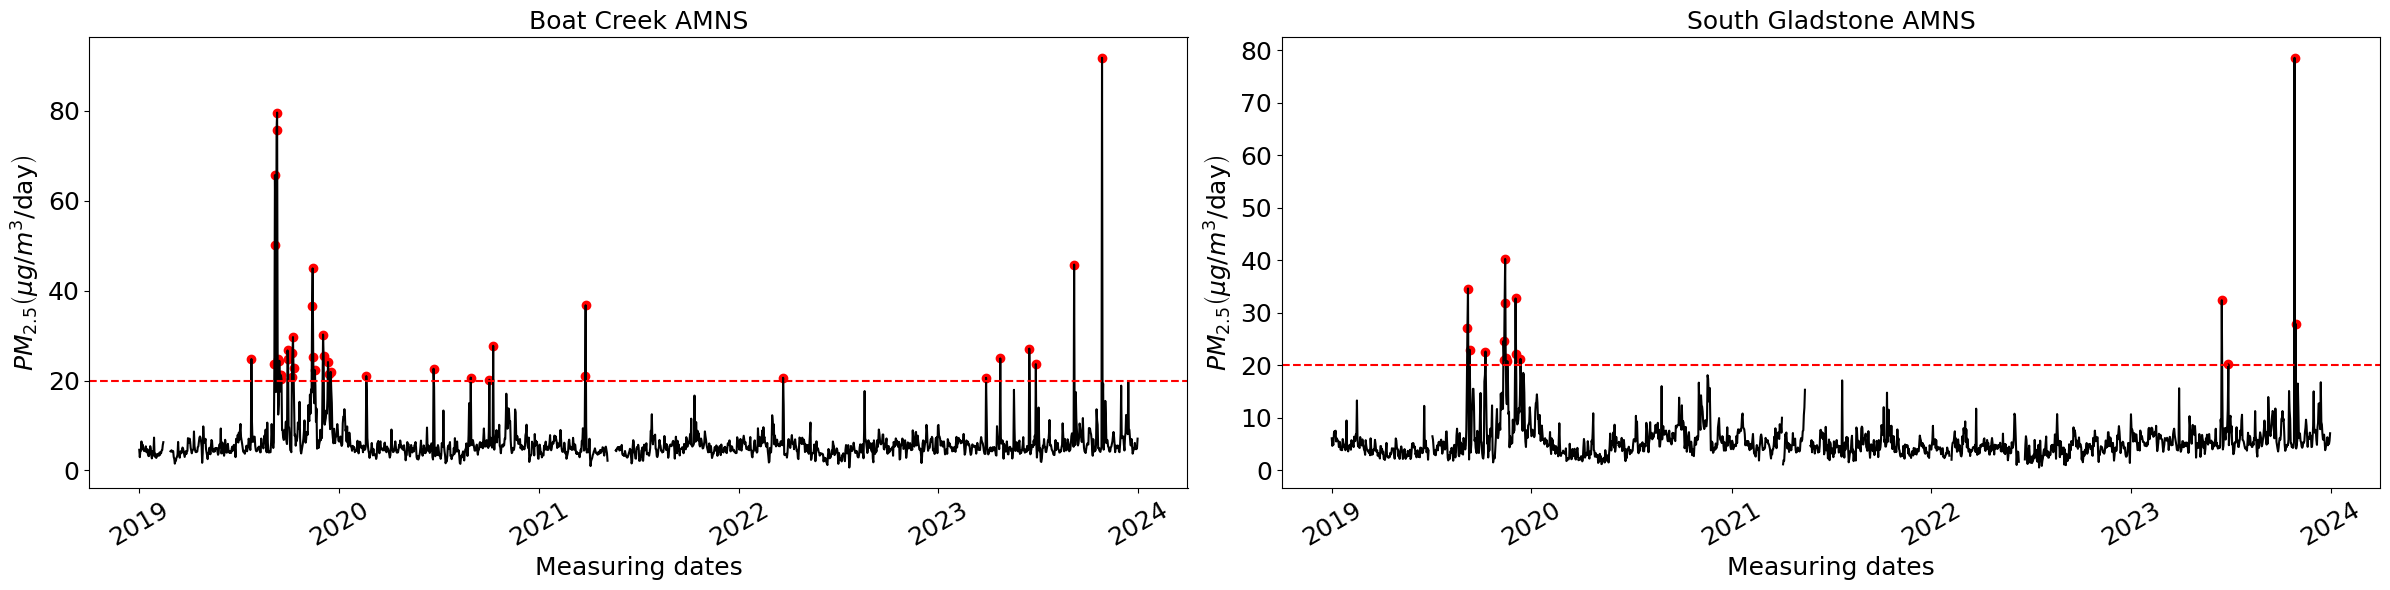

In [17]:
criterion = 20
# plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 6))

# Boat Creek
df_24 = df_bc.groupby(by=['year','month','day'])['PM2.5 (ug/m^3)'].mean().reset_index()
df_24['date'] = pd.to_datetime(df_24[['year', 'month', 'day']])
y = df_24['PM2.5 (ug/m^3)']
x = df_24.date
ax1.plot(x,y,'k-')
ax1.axhline(y=criterion, color='red', linestyle='--', label=f'Criterion: {criterion}')
ax1.set_xlabel('Measuring dates', fontsize=FontSize)
ax1.set_ylabel(r'$PM_{2.5} \left(\mu g/m^3/\text{day}\right)$', fontsize=FontSize)
ax1.tick_params(axis='x', rotation=30, labelsize=TickSize)
ax1.tick_params(axis='y', labelsize=TickSize)
ax1.set_title('Boat Creek AMNS', fontsize=TickSize)

# show the exceedance
z = df_24[y > criterion]
ax1.scatter(z.date, z['PM2.5 (ug/m^3)'], color='red', label=f'y > {criterion}')

print(f'Boat Creek PM2.5 24hr max is {y.max()}')

# South Gladstone
df_24 = df_sg.groupby(by=['year','month','day'])['PM2.5 (ug/m^3)'].mean().reset_index()
df_24['date'] = pd.to_datetime(df_24[['year', 'month', 'day']])
y = df_24['PM2.5 (ug/m^3)']
x = df_24.date
ax2.plot(x,y,'k-')
ax2.axhline(y=criterion, color='red', linestyle='--', label=f'Criterion: {criterion}')
ax2.set_xlabel('Measuring dates', fontsize=FontSize)
ax2.set_ylabel(r'$PM_{2.5} \left(\mu g/m^3/\text{day}\right)$', fontsize=FontSize)
ax2.tick_params(axis='x', rotation=30, labelsize=TickSize)
ax2.tick_params(axis='y', labelsize=TickSize)
ax2.set_title('South Gladstone AMNS', fontsize=TickSize)

# show the exceedance
z = df_24[y > criterion]
ax2.scatter(z.date, z['PM2.5 (ug/m^3)'], color='red', label=f'y > {criterion}')

print(f'South Gladstone PM2.5 24hr max is {y.max()}')


# plot
plt.tight_layout()
plt.show()

> ## now to check the yearly concentration level

> PM10

In [18]:
df_bc.head()

,Date,Time,Wind Direction (degTN),Wind Speed (m/s),Wind Sigma Theta (deg),Wind Speed Std Dev (m/s),Air Temperature (degC),Relative Humidity (%),Nitrogen Oxide (ppm),Nitrogen Dioxide (ug/m^3),...,Sulfur Dioxide (ug/m^3),PM10 (ug/m^3),PM2.5 (ug/m^3),Visibility-reducing Particles (Mm^-1),Nitric Oxide (ppm),Barometric Pressure (hPa),year,month,day,hour
Datetime,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,01/01/2019,00:00,159.0,1.3,18.0,0.5,23.4,82.8,NaN,NaN,...,NaN,19.1,6.0,NaN,NaN,NaN,2019,1,1,0
2019-01-01 01:00:00,01/01/2019,01:00,131.0,1.4,26.0,0.6,23.4,84.4,0.0,7.52,...,0.00000,16.4,3.2,14.0,NaN,NaN,2019,1,1,1
2019-01-01 02:00:00,01/01/2019,02:00,112.0,2.2,21.6,0.9,23.9,80.1,0.0,5.64,...,0.00262,16.8,2.8,17.0,NaN,NaN,2019,1,1,2
2019-01-01 03:00:00,01/01/2019,03:00,151.0,1.4,19.7,0.5,23.3,83.7,0.0,7.52,...,0.00262,17.4,2.1,20.0,NaN,NaN,2019,1,1,3
2019-01-01 04:00:00,01/01/2019,04:00,159.0,1.2,16.6,0.5,22.7,84.5,0.0,9.40,...,0.00262,17.6,2.4,20.0,NaN,NaN,2019,1,1,4


## List all pollutants and the 100 and 90 percentile

> PM10 24hr 50, yearly 25
>
> PM2.5 24hr 20, yearly 7
>
> NO2 hourly 164, yearly 31
>
> SO2 hourly 214, 24hrs 57, yearly 57
>
> Benzene yearly 5.4

In [26]:
df_bc.head(2)

,Date,Time,Wind Direction (degTN),Wind Speed (m/s),Wind Sigma Theta (deg),Wind Speed Std Dev (m/s),Air Temperature (degC),Relative Humidity (%),Nitrogen Oxide (ppm),Nitrogen Dioxide (ug/m^3),...,Sulfur Dioxide (ug/m^3),PM10 (ug/m^3),PM2.5 (ug/m^3),Visibility-reducing Particles (Mm^-1),Nitric Oxide (ppm),Barometric Pressure (hPa),year,month,day,hour
Datetime,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,01/01/2019,00:00,159.0,1.3,18.0,0.5,23.4,82.8,NaN,NaN,...,NaN,19.1,6.0,NaN,NaN,NaN,2019,1,1,0
2019-01-01 01:00:00,01/01/2019,01:00,131.0,1.4,26.0,0.6,23.4,84.4,0.0,7.52,...,0.0,16.4,3.2,14.0,NaN,NaN,2019,1,1,1


> hourly max and 90 percentile

In [46]:
# get the hourly maximum
df_bc_hr_max_per_year = df_bc.groupby(['year'])[df_bc.select_dtypes(include='float').columns].max().reset_index()
df_mp_hr_max_per_year = df_mp.groupby(['year'])[df_mp.select_dtypes(include='float').columns].max().reset_index()
df_sg_hr_max_per_year = df_sg.groupby(['year'])[df_sg.select_dtypes(include='float').columns].max().reset_index()
# get the 90 percentile
df_bc_hr_m90_per_year = df_bc.groupby(['year'])[df_bc.select_dtypes(include='float').columns].quantile(0.90).reset_index()
df_mp_hr_m90_per_year = df_mp.groupby(['year'])[df_mp.select_dtypes(include='float').columns].quantile(0.90).reset_index()
df_sg_hr_m90_per_year = df_sg.groupby(['year'])[df_sg.select_dtypes(include='float').columns].quantile(0.90).reset_index()

In [52]:
df_bc_hr_max_per_year.T

,0,1,2,3,4
year,2019.00000,2020.00000,2021.00000,2022.00000,2023.00000
Wind Direction (degTN),360.00000,360.00000,360.00000,360.00000,360.00000
Wind Speed (m/s),7.20000,6.90000,6.90000,9.70000,7.40000
Wind Sigma Theta (deg),193.10000,109.20000,64.50000,84.50000,77.00000
Wind Speed Std Dev (m/s),3.10000,2.30000,3.20000,2.20000,2.00000
Air Temperature (degC),37.70000,35.60000,38.90000,37.10000,36.40000
Relative Humidity (%),97.40000,NaN,NaN,NaN,NaN
Nitrogen Oxide (ppm),0.16900,NaN,0.08000,0.07800,0.09600
Nitrogen Dioxide (ug/m^3),122.20000,71.44000,78.96000,60.16000,69.56000
Nitrogen Oxides (ppm),0.20800,0.13000,0.10500,0.10600,0.13200


In [53]:
df_mp_hr_max_per_year.T

,0,1,2,3,4
year,2019.00000,2020.00000,2021.00000,2022.00000,2023.00000
Ozone (ppm),0.06000,0.04500,0.04900,0.04500,0.04500
Nitrogen Dioxide (ug/m^3),62.04000,62.04000,65.80000,60.16000,73.32000
Sulfur Dioxide (ug/m^3),0.20436,0.14934,0.11004,0.21222,0.21484
Benzene (ug/m^3),17.18790,15.24210,16.86360,9.40470,24.32250
Toluene (ppb),33.50000,25.20000,29.20000,37.90000,37.90000
Xylenes (total) (ppb),143.70000,102.30000,41.30000,29.00000,13.70000
Formaldehyde (ppb),14.00000,12.00000,9.10000,7.80000,11.00000


In [54]:
df_sg_hr_max_per_year.T

,0,1,2,3,4
year,2019.00000,2020.00000,2021.00000,2022.00000,2023.00000
Wind Direction (degTN),360.00000,360.00000,359.00000,360.00000,360.00000
Wind Speed (m/s),6.60000,6.30000,5.80000,6.40000,5.50000
Wind Sigma Theta (deg),192.30000,105.70000,63.90000,59.10000,68.40000
Wind Speed Std Dev (m/s),3.70000,2.10000,2.60000,2.00000,1.90000
Air Temperature (degC),33.50000,33.60000,35.10000,36.50000,34.40000
Relative Humidity (%),90.40000,91.70000,92.50000,94.50000,94.10000
Rainfall (mm),37.10000,34.30000,39.60000,40.00000,47.40000
Barometric Pressure (hPa),1027.00000,1026.00000,1027.00000,1025.00000,1029.00000
Solar Radiation (w/m^2),1163.00000,1185.00000,1164.00000,1195.00000,1177.00000


In [51]:
df_bc_hr_m90_per_year.T

,0,1,2,3,4
year,2019.00000,2020.00000,2021.00000,2022.00000,2023.00000
Wind Direction (degTN),292.00000,292.00000,296.00000,292.00000,297.80000
Wind Speed (m/s),4.50000,4.30000,4.20000,4.00000,4.10000
Wind Sigma Theta (deg),51.30000,34.20000,29.21000,29.50000,29.90000
Wind Speed Std Dev (m/s),1.40000,1.30000,1.40000,1.20000,1.20000
Air Temperature (degC),29.00000,28.90000,28.50000,28.40000,28.70000
Relative Humidity (%),92.60000,NaN,NaN,NaN,NaN
Nitrogen Oxide (ppm),0.00800,NaN,0.00800,0.00700,0.00700
Nitrogen Dioxide (ug/m^3),22.56000,20.68000,20.68000,18.80000,20.68000
Nitrogen Oxides (ppm),0.01900,0.01800,0.01800,0.01600,0.01800


In [55]:
df_mp_hr_m90_per_year.T

,0,1,2,3,4
year,2019.00000,2020.00000,2021.00000,2022.00000,2023.00000
Ozone (ppm),0.02700,0.02700,0.03100,0.02300,0.02200
Nitrogen Dioxide (ug/m^3),15.04000,16.92000,16.92000,16.92000,18.80000
Sulfur Dioxide (ug/m^3),0.02358,0.01834,0.01572,0.01834,0.01572
Benzene (ug/m^3),6.22656,5.18880,6.48600,3.89160,4.21590
Toluene (ppb),3.20000,2.40000,2.30000,1.80000,1.80000
Xylenes (total) (ppb),11.30000,9.30000,9.70000,6.00000,6.30000
Formaldehyde (ppb),5.90000,5.90000,5.50000,4.10000,3.50000


In [56]:
df_sg_hr_m90_per_year.T

,0,1,2,3,4
year,2019.00000,2020.0000,2021.00000,2022.0000,2023.0000
Wind Direction (degTN),246.00000,242.0000,249.00000,236.9000,259.3000
Wind Speed (m/s),4.20000,3.8000,3.60000,3.5000,3.5000
Wind Sigma Theta (deg),36.41000,26.7000,23.80000,24.1000,27.1100
Wind Speed Std Dev (m/s),1.40000,1.4000,1.30000,1.2000,1.3000
Air Temperature (degC),27.90000,28.0000,27.60000,27.8000,27.9200
Relative Humidity (%),80.20000,81.7000,84.50000,86.5000,83.4000
Rainfall (mm),0.00000,0.0000,0.00000,0.0000,0.0000
Barometric Pressure (hPa),1021.00000,1020.0000,1020.00000,1018.0000,1021.0000
Solar Radiation (w/m^2),843.00000,826.2000,806.00000,792.0000,801.0000


> 24hr max and 90 percentile

In [68]:
# average per day
df_bc_24hr_per_year = df_bc.groupby(['year','month','day'])[df_bc.select_dtypes(include='float').columns].mean().reset_index()
df_mp_24hr_per_year = df_mp.groupby(['year','month','day'])[df_mp.select_dtypes(include='float').columns].mean().reset_index()
df_sg_24hr_per_year = df_sg.groupby(['year','month','day'])[df_sg.select_dtypes(include='float').columns].mean().reset_index()
# get the maximum
df_bc_24hr_max_per_year = df_bc_24hr_per_year.groupby(['year']).max().reset_index()
df_mp_24hr_max_per_year = df_mp_24hr_per_year.groupby(['year']).max().reset_index()
df_sg_24hr_max_per_year = df_sg_24hr_per_year.groupby(['year']).max().reset_index()
# get the 90 percentile
df_bc_24hr_m90_per_year = df_bc_24hr_per_year.groupby(['year']).quantile(0.90).reset_index()
df_mp_24hr_m90_per_year = df_mp_24hr_per_year.groupby(['year']).quantile(0.90).reset_index()
df_sg_24hr_m90_per_year = df_sg_24hr_per_year.groupby(['year']).quantile(0.90).reset_index()

In [69]:
df_bc_24hr_max_per_year.T

,0,1,2,3,4
year,2019.000000,2020.000000,2021.000000,2022.000000,2023.000000
month,12.000000,12.000000,12.000000,12.000000,12.000000
day,31.000000,31.000000,31.000000,31.000000,31.000000
Wind Direction (degTN),295.350000,301.833333,309.291667,308.750000,299.333333
Wind Speed (m/s),4.885714,5.037500,4.337500,4.129167,4.941667
Wind Sigma Theta (deg),89.891667,46.233333,30.208333,33.833333,32.954167
Wind Speed Std Dev (m/s),1.528571,1.520833,1.475000,1.279167,1.429167
Air Temperature (degC),29.812500,30.129167,30.441667,30.566667,29.854167
Relative Humidity (%),92.288889,NaN,NaN,NaN,NaN
Nitrogen Oxide (ppm),0.016050,NaN,0.014043,0.013727,0.018875


In [70]:
df_mp_24hr_max_per_year.T

,0,1,2,3,4
year,2019.000000,2020.000000,2021.000000,2022.000000,2023.000000
month,12.000000,12.000000,12.000000,12.000000,12.000000
day,31.000000,31.000000,31.000000,31.000000,31.000000
Ozone (ppm),0.036583,0.030208,0.034042,0.024833,0.025667
Nitrogen Dioxide (ug/m^3),29.688333,25.066667,30.941667,22.168333,23.949565
Sulfur Dioxide (ug/m^3),0.047924,0.025873,0.021397,0.028602,0.026091
Benzene (ug/m^3),7.612516,6.782100,7.487100,3.715938,4.187700
Toluene (ppb),6.520833,5.075000,7.482609,5.341667,8.045833
Xylenes (total) (ppb),26.262500,14.666667,12.640000,8.950000,6.475000
Formaldehyde (ppb),8.000000,6.487500,6.045833,4.166667,4.628571


In [71]:
df_sg_24hr_max_per_year.T

,0,1,2,3,4
year,2019.000000,2020.000000,2021.000000,2022.000000,2023.000000
month,12.000000,12.000000,12.000000,12.000000,12.000000
day,31.000000,31.000000,31.000000,31.000000,31.000000
Wind Direction (degTN),292.625000,283.041667,338.750000,310.583333,291.791667
Wind Speed (m/s),4.712500,4.404167,4.641667,4.008333,3.766667
Wind Sigma Theta (deg),62.420833,36.591667,25.391667,25.908333,30.162500
Wind Speed Std Dev (m/s),1.479167,1.558333,1.641667,1.387500,1.450000
Air Temperature (degC),28.795833,29.079167,29.829167,30.575000,29.150000
Relative Humidity (%),88.054167,88.075000,89.550000,90.566667,90.608333
Rainfall (mm),2.279167,2.850000,3.279167,4.683333,3.066667


In [72]:
df_bc_24hr_m90_per_year.T

,0,1,2,3,4
year,2019.000000,2020.000000,2021.000000,2022.000000,2023.000000
month,11.000000,11.000000,11.000000,11.000000,11.000000
day,28.000000,28.000000,28.000000,28.000000,28.000000
Wind Direction (degTN),214.825000,235.812500,235.475000,237.808333,226.325000
Wind Speed (m/s),3.716667,3.477083,3.386667,3.331667,3.292500
Wind Sigma Theta (deg),47.536667,28.735417,24.300000,23.451667,24.703333
Wind Speed Std Dev (m/s),1.241667,1.125000,1.152500,1.006667,1.009167
Air Temperature (degC),27.178333,27.404167,26.690000,26.880833,27.000000
Relative Humidity (%),83.500833,NaN,NaN,NaN,NaN
Nitrogen Oxide (ppm),0.006477,NaN,0.005835,0.005150,0.005800


In [73]:
df_mp_24hr_m90_per_year.T

,0,1,2,3,4
year,2019.000000,2020.000000,2021.000000,2022.000000,2023.000000
month,11.000000,11.000000,11.000000,11.000000,11.000000
day,28.000000,28.000000,28.000000,28.000000,28.000000
Ozone (ppm),0.025271,0.024067,0.028775,0.020292,0.020000
Nitrogen Dioxide (ug/m^3),13.434167,13.567333,13.786667,13.316667,14.382000
Sulfur Dioxide (ug/m^3),0.016539,0.011528,0.010698,0.011834,0.009760
Benzene (ug/m^3),5.527841,4.229412,5.889100,3.015007,3.337588
Toluene (ppb),2.930435,2.273333,2.045362,1.604381,1.707500
Xylenes (total) (ppb),10.595000,8.508333,8.314203,5.438859,5.498333
Formaldehyde (ppb),5.136742,5.250833,4.891667,3.514583,3.059605


In [74]:
df_sg_24hr_m90_per_year.T

,0,1,2,3,4
year,2019.000000,2020.000000,2021.000000,2022.000000,2023.000000
month,11.000000,11.000000,11.000000,11.000000,11.000000
day,28.000000,28.000000,28.000000,28.000000,28.000000
Wind Direction (degTN),198.483333,203.104167,217.450000,206.229167,203.441667
Wind Speed (m/s),3.702500,3.320833,3.165833,3.070000,2.974167
Wind Sigma Theta (deg),36.966667,24.535417,20.288333,20.966250,22.805833
Wind Speed Std Dev (m/s),1.279167,1.183333,1.146667,1.069583,1.078056
Air Temperature (degC),27.059167,27.210417,26.690833,26.820000,27.054167
Relative Humidity (%),74.134167,76.775000,79.586667,81.587917,78.025000
Rainfall (mm),0.017500,0.102083,0.215833,0.166667,0.079167


> yearly data

In [75]:
df_bc_year = df_bc.groupby(['year'])[df_bc.select_dtypes(include='float').columns].mean().reset_index()
df_mp_year = df_mp.groupby(['year'])[df_mp.select_dtypes(include='float').columns].mean().reset_index()
df_sg_year = df_sg.groupby(['year'])[df_sg.select_dtypes(include='float').columns].mean().reset_index()

In [76]:
df_bc_year.T

,0,1,2,3,4
year,2019.000000,2020.000000,2021.000000,2022.000000,2023.000000
Wind Direction (degTN),154.362548,159.708357,165.612892,169.539421,163.809094
Wind Speed (m/s),2.593562,2.434328,2.339268,2.331565,2.320690
Wind Sigma Theta (deg),29.001762,21.323679,19.150423,19.440460,19.885205
Wind Speed Std Dev (m/s),0.922861,0.866378,0.861316,0.707831,0.711116
Air Temperature (degC),22.787844,22.878917,22.484205,22.305619,22.663599
Relative Humidity (%),77.128851,NaN,NaN,NaN,NaN
Nitrogen Oxide (ppm),0.003383,NaN,0.003082,0.002767,0.002909
Nitrogen Dioxide (ug/m^3),9.909295,9.285081,8.834576,8.529091,9.096070
Nitrogen Oxides (ppm),0.008485,0.008000,0.007781,0.007363,0.007827


In [77]:
df_mp_year.T

,0,1,2,3,4
year,2019.000000,2020.000000,2021.000000,2022.000000,2023.000000
Ozone (ppm),0.018678,0.018718,0.021961,0.015129,0.014126
Nitrogen Dioxide (ug/m^3),7.577831,7.311243,8.067148,7.542448,7.658334
Sulfur Dioxide (ug/m^3),0.009540,0.006046,0.005485,0.005617,0.005375
Benzene (ug/m^3),4.154151,3.532097,4.026838,2.313731,2.712846
Toluene (ppb),1.958446,1.657902,1.610103,1.183953,1.133877
Xylenes (total) (ppb),7.731112,6.896113,6.486160,3.791079,4.113017
Formaldehyde (ppb),4.091322,4.582469,4.180974,2.948945,2.206900


In [78]:
df_sg_year.T

,0,1,2,3,4
year,2019.000000,2020.000000,2021.000000,2022.000000,2023.000000
Wind Direction (degTN),134.372931,134.718665,139.297955,143.263231,140.647917
Wind Speed (m/s),2.480967,2.337701,2.177769,2.149828,2.135460
Wind Sigma Theta (deg),23.164103,17.778239,16.559854,17.004311,18.826698
Wind Speed Std Dev (m/s),0.946492,0.887479,0.850605,0.762762,0.786247
Air Temperature (degC),23.096177,23.019619,22.761224,22.516728,22.946281
Relative Humidity (%),63.299674,65.659462,67.108164,69.979628,66.583095
Rainfall (mm),0.028403,0.075971,0.105642,0.091941,0.061510
Barometric Pressure (hPa),1014.653806,1013.893699,1012.999657,1012.172913,1014.258499
Solar Radiation (w/m^2),254.838695,247.652238,240.923744,232.688813,240.917960


In [ ]:
https://www.npi.gov.au/npidata/action/load/emission-by-facility-result/criteria/destination/ALL/source-type/INDUSTRY/subthreshold-data/Yes/substance-name/All/year/2023